<a href="https://colab.research.google.com/github/Nour-25/Real_time_Drowsiness_Detection/blob/main/Real_time_Drowsiness_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install tensorflow-gpu
! unzip /content/colab_eye.zip -d /content 

In [ ]:
import tensorflow as tf
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm_notebook as tqdm

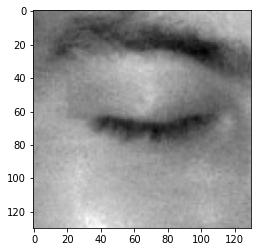

In [ ]:
dataDirectory="/content"
Classes = ["close_look","open_eye"]
for category in Classes: 
    path = os.path.join(dataDirectory,category)
    for img in os.listdir(path):
        img_array=cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
        backtorpgb=cv.cvtColor(img_array,cv.COLOR_GRAY2RGB)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

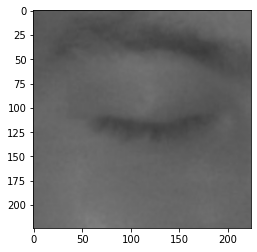

In [ ]:
img_size =224
new_array=cv.resize(backtorpgb,(img_size,img_size))
plt.imshow(new_array,cmap="gray")
plt.show()

# reading all img nd converting them into an array for data and labels 

In [ ]:
training_Data = []
def create_Training_Data() :
    for category in tqdm(Classes): 
        path = os.path.join(dataDirectory,category)
        class_num =Classes.index(category)
        for img in tqdm(os.listdir(path)):
            try:
                img_array=cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
                backtorpgb=cv.cvtColor(img_array,cv.COLOR_GRAY2RGB)
                new_array=cv.resize(backtorpgb,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

            

In [ ]:
create_Training_Data()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


  0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/3828 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
print(len(training_Data))
training_Data[1]

3828


[array([[[ 65,  65,  65],
         [ 65,  65,  65],
         [ 66,  66,  66],
         ...,
         [111, 111, 111],
         [113, 113, 113],
         [113, 113, 113]],
 
        [[ 65,  65,  65],
         [ 65,  65,  65],
         [ 66,  66,  66],
         ...,
         [111, 111, 111],
         [112, 112, 112],
         [113, 113, 113]],
 
        [[ 64,  64,  64],
         [ 64,  64,  64],
         [ 65,  65,  65],
         ...,
         [111, 111, 111],
         [112, 112, 112],
         [112, 112, 112]],
 
        ...,
 
        [[ 82,  82,  82],
         [ 82,  82,  82],
         [ 83,  83,  83],
         ...,
         [ 84,  84,  84],
         [ 84,  84,  84],
         [ 84,  84,  84]],
 
        [[ 83,  83,  83],
         [ 83,  83,  83],
         [ 83,  83,  83],
         ...,
         [ 85,  85,  85],
         [ 85,  85,  85],
         [ 85,  85,  85]],
 
        [[ 83,  83,  83],
         [ 83,  83,  83],
         [ 83,  83,  83],
         ...,
         [ 85,  85,  85],
  

In [ ]:
#np.savetxt('eye_data.csv',training_Data , delimiter=',')

In [ ]:
import random
random.shuffle(training_Data)

In [ ]:
x =[]
y = []

for features,label in tqdm(training_Data):
    x.append(features)
    y.append(label)
x= np.array(x).reshape(-1,img_size,img_size,3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/3828 [00:00<?, ?it/s]

In [ ]:
x.shape

(3828, 224, 224, 3)

In [ ]:
#normalisation
x=x/255.0

In [ ]:
y = np.array(y)

In [ ]:
import pickle

In [ ]:
pickle_out = open("x.pickle","wb")
pickle.dump(x,pickle_out, protocol=4)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out, protocol=4)
pickle_out.close()


# deep learning model for trainning

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model= tf.keras.applications.mobilenet.MobileNet()

In [ ]:
model.summary()

# Transfer learning

In [ ]:
base_input = model.layers[0].input 

In [ ]:
base_output =model.layers[-4].output

In [ ]:
Flat_layers = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layers)
final_ouput = layers.Activation('sigmoid')(final_output)

In [ ]:
new_model =keras.Model(inputs =base_input,outputs= final_output)

In [ ]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

# settings for binary  classification (open /closed)

In [ ]:
new_model.compile(loss="binary_crossentropy", optimizer ="adam", metrics =["accuracy"])

In [ ]:
new_model.fit(x,y,epochs =1 , validation_split=0.1)

108/108 [==============================] - 378s 3s/step - loss: 0.7123 - accuracy: 0.9498 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


In [ ]:
new_model.save('my_model.h5')

In [ ]:
new_model = tf.keras.models.load_model('my_model.h5')

# ckecking the network for predications

In [ ]:
img_array= cv.imread('/content/open_eye/open_eye/s0001_02097_0_0_1_0_0_01.png',cv.IMREAD_GRAYSCALE)
backtrogb = cv.cvtColor(img_array,cv.COLOR_GRAY2RGB)
new_array=cv.resize(backtrogb,(img_size,img_size)) 

In [ ]:
x_input =np.array(new_array).reshape(1,img_size,img_size,3)

In [ ]:
x_input.shape


(1, 224, 224, 3)

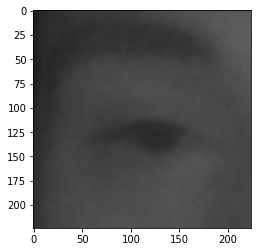

In [ ]:
plt.imshow(new_array)

In [ ]:
x_input=x_input/255.0


In [ ]:
prediction =new_model.predict(x_input)


In [ ]:
prediction



array([[-41.749954]], dtype=float32)